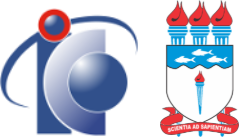

> ## **UNIVERSIDADE FEDERAL DE ALAGOAS - UFAL**
> ### **INSTITUTO DE COMPUTAÇÃO - IC**
> #### Nome: **Bruno Lemos de Lima** &emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp; **|**&emsp;&emsp; Matrícula: **19110935**
> #### Nome: **Karla Sophia Santana da Cruz**&emsp;&nbsp; **|**&emsp;&emsp; Matrícula: **19111113**
> #### Curso: **Engenharia de Computação** &emsp;&emsp; **|** &emsp;&emsp;Período: **2023.1**

# **Processamento de Linguagem Natural - Thales Vieira**

#### requirements

In [1]:
import io
import re
import nltk
import string
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.stem import LancasterStemmer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
plt.style.use('ggplot')

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/caosmen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/caosmen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/caosmen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#### dataset movies_genre

In [4]:
parquet_url = 'https://github.com/karlasophiacruz/nlp-2023.1/raw/main/dataset/movie_genre.parquet'
parquet_content = requests.get(parquet_url).content
parquet_file = io.BytesIO(parquet_content)

In [5]:
df = pd.read_parquet(parquet_file)
df.drop_duplicates(subset = ['movie_name'], inplace = True)
df.drop_duplicates(subset = ['synopsis'], inplace = True)
df.head()

,id,movie_name,synopsis,genre
0,44978,Super Me,A young scriptwriter starts bringing valuable ...,fantasy
1,50185,Entity Project,A director and her friends renting a haunted h...,horror
2,34131,Behavioral Family Therapy for Serious Psychiat...,This is an educational video for families and ...,family
3,78522,Blood Glacier,Scientists working in the Austrian Alps discov...,scifi
4,2206,Apat na anino,Buy Day - Four Men Widely - Apart in Life - By...,action


In [6]:
df['text'] = df['movie_name'] + ' ' + df['synopsis']
df['original_text'] = df['movie_name'] + ': ' + df['synopsis']
df = df.drop(['movie_name','synopsis'],axis=1)
df.columns=['id','class','text','original_text']

In [7]:
df.nunique()

id               43418
class               10
text             43418
original_text    43418
dtype: int64

In [8]:
df_resample_class = []

for genre in df['class'].unique():
    df_class = df[df['class'] == genre]
    df_resample = df_class.sample(n = min(1000, df_class.shape[0]), random_state = 42)
    df_resample_class.append(df_resample)

df = pd.concat(df_resample_class, ignore_index = True)

In [9]:
df.head()

,id,class,text,original_text
0,38401,fantasy,Monster High: Welcome to Monster High When Dra...,Monster High: Welcome to Monster High: When Dr...
1,44720,fantasy,Yanka y el espíritu del volcán A 13 year old g...,Yanka y el espíritu del volcán: A 13 year old ...
2,38032,fantasy,You xia qing Du Meng Fei fresh out of Kung-Fu ...,You xia qing: Du Meng Fei fresh out of Kung-Fu...
3,40538,fantasy,The Beast of Bodmin Moor Nicholas Felt and Jac...,The Beast of Bodmin Moor: Nicholas Felt and Ja...
4,38634,fantasy,Captain Yagit A STREET SCUM BECOMES A LEADER.,Captain Yagit: A STREET SCUM BECOMES A LEADER.


In [10]:
df.nunique()

id               10000
class               10
text             10000
original_text    10000
dtype: int64

### **1.** Escreva uma função que recebe uma senha como entrada e verifica se ela atende aos seguintes critérios de uma senha forte:

#### - Pelo menos 8 caracteres
#### - Pelo menos uma letra maiúscula e uma letra minúscula
#### - Pelo menos um dígito
#### - Pelo menos um caractere especial (por exemplo, !@#$%&*)

### A função deve retornar True se a senha for forte e False caso contrário. Mostre exemplos.

In [11]:
def check_password(password):
  return bool(re.match(r'^(?=.*[a-z])(?=.*[A-Z])(?=.*\d)(?=.*[!@#$%&*]).{8,}$', password))

#### Exemplo 1: Senha válida

In [12]:
ex1 = 'Abcdefg123@'
check_password(ex1)

True

#### Exemplo 2: Senha válida

In [13]:
ex2 = 'senhaV123@'
check_password(ex2)

True

#### Exemplo 3: Senha inválida (menos de 8 caracteres)

In [14]:
ex3 = 'saV123@'
check_password(ex3)

False

#### Exemplo 4: Senha inválida (sem letra maiúscula)

In [15]:
ex4 = 'pass123@'
check_password(ex4)

False

#### Exemplo 5: Senha inválida (sem letra minúscula)

In [16]:
ex5 = 'PASS123@'
check_password(ex5)

False

#### Exemplo 6: Senha inválida (sem dígitos)

In [17]:
ex6 = 'PASSword@'
check_password(ex6)

False

#### Exemplo 7: Senha inválida (sem caractere especial)

In [18]:
ex7 = 'PASSword123'
check_password(ex7)

False

### **2.** Escreva uma função que recebe um endereço de e-mail como entrada e verifica se ele é válido de acordo com as regras básicas de formação de um e-mail. Utilize expressões regulares para realizar a validação. A função deve retornar True se o endereço de e-mail for válido e False caso contrário. Mostre exemplos.

In [19]:
def check_email(email):
    re_exp = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b'
    if re.match(re_exp, email):
        return True
    return False

#### Exemplo 1: Email válido

In [20]:
ex1 = 'kssc@ic.ufal.br'
check_email(ex1)

True

#### Exemplo 2: Email válido

In [21]:
ex2 = 'karlasophiacruz2001@gmail.com'
check_email(ex2)

True

#### Exemplo 3: Email inválido (sem domínio)

In [22]:
ex3 = 'ksc@hotmail'
check_email(ex3)

False

####  Exemplo 4: Email inválido (sem @)

In [23]:
ex4 = 'ksc123.ig.net'
check_email(ex4)

False

### **3.** Considere o seguinte exemplo de referência de livro em formato de citação APA:

> #### **Manning, C. D., Manning, C. D., & Schutze, H. (1999). Foundations of statistical natural language processing. MIT press.**

### Implemente uma função usando expressões regulares que extraia cada autor, ano de publicação, título e editora do livro, para qualquer referência de livro neste formato.

In [24]:
def extract_book_info(book_reference):
    authors_pattern = r"\s*&*\s*(?P<author>.+?)(\.,|\.\s*\()"
    year_pattern = r"\((?P<year>\d{4}).*\)\."
    title_pattern = r"\)\. (?P<title>[^.]+)\."
    publisher_pattern = r"\.\s*(?P<publisher>[^\.]+)\.\s*$"

    authors = [f'{match.group("author")}.' for match in re.finditer(authors_pattern, book_reference)]

    year_match = re.search(year_pattern, book_reference)
    year = int(year_match.group("year")) if year_match else None

    title_match = re.search(title_pattern, book_reference)
    title = title_match.group("title") if title_match else None

    publisher_matches = re.findall(publisher_pattern, book_reference)
    publisher = publisher_matches[0].split(',')[0] if publisher_matches else None

    return {
        'authors': authors,
        'year': year,
        'title': title,
        'publisher': publisher
    }

#### Exemplo 1:

In [25]:
book_reference = "Manning, C. D., Manning, C. D., & Schutze, H. (1999). Foundations of statistical natural language processing. MIT press."
result = extract_book_info(book_reference)
result

{'authors': ['Manning, C. D.', 'Manning, C. D.', 'Schutze, H.'],
 'year': 1999,
 'title': 'Foundations of statistical natural language processing',
 'publisher': 'MIT press'}

#### Exemplo 2:

In [26]:
book_reference = "Newman, J. L., Fuqua, D. R., Gray, E. A., & Simpson, D. B. (2006). Gender differences in the relationship of anger and depression in a clinical sample. Journal of Counseling & Development, 84, 157-161."
result = extract_book_info(book_reference)
result

{'authors': ['Newman, J. L.', 'Fuqua, D. R.', 'Gray, E. A.', 'Simpson, D. B.'],
 'year': 2006,
 'title': 'Gender differences in the relationship of anger and depression in a clinical sample',
 'publisher': 'Journal of Counseling & Development'}

#### Exemplo 3:

In [27]:
book_reference = "Denhart, H. (2008). Deconstructing barriers: Perceptions of students labeled with learning disabilities in higher education. Journal of Learning Disabilities, 41(6), 483-497."
result = extract_book_info(book_reference)
result

{'authors': ['Denhart, H.'],
 'year': 2008,
 'title': 'Deconstructing barriers: Perceptions of students labeled with learning disabilities in higher education',
 'publisher': 'Journal of Learning Disabilities'}

### **4.** Usando sua base de textos, determine a distribuição de comprimentos dos textos (em quantidade de caracteres), listando estas quantidades e plotando um histograma.

In [28]:
text_len = df['text'].apply(len)

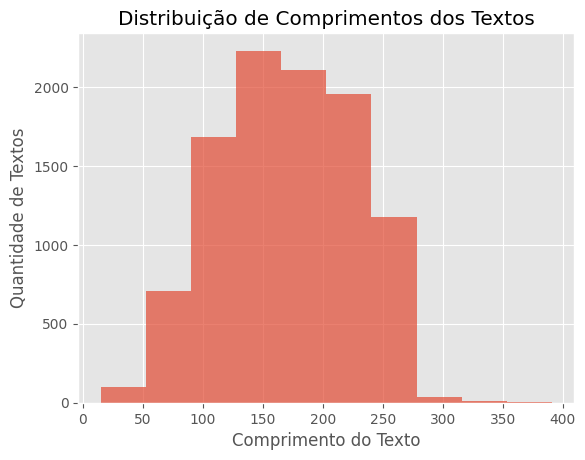

In [29]:
plt.hist(text_len, alpha=0.7)

plt.xlabel('Comprimento do Texto')
plt.ylabel('Quantidade de Textos')
plt.title('Distribuição de Comprimentos dos Textos')
plt.grid(True)
plt.show()

### **5.** Aplique os seguintes passos de pré-processamento aos textos:

#### - Remova todas as palavras que contêm números;
#### - Converta as palavras para minúsculas;
#### - Remova pontuação;
#### - Tokenize os textos em palavras, gerando um dicionário único com $n$ tokens e convertendo cada texto em um vetor de dimensão $n$ com a respectiva contagem de palavras.

### Em seguida, encontre as 10 palavras mais frequentes da base de textos.

In [30]:
def contains_word_with_number(text):
    return bool(re.search(r'\b\w*\d\w*\b', text))

def remove_words_with_numbers(text):
  return re.sub('\w*\d\w*', ' ', text)

def convert_lowercase(text):
  return text.lower()

def remove_punctuation(text):
  return re.sub('[%s]' % re.escape(string.punctuation), ' ', text)

def tokenize_texts(texts):
  token_counts = Counter()

  tokenized_texts = []

  if all(isinstance(text, list) for text in texts):
    for tokens in texts:
      token_counts.update(tokens)
      tokenized_texts.append(tokens)

  else:
    for text in texts:
      tokens = word_tokenize(text)
      token_counts.update(tokens)
      tokenized_texts.append(tokens)

  unique_tokens = list(token_counts.keys())
  token_index = {token: i for i, token in enumerate(unique_tokens)}

  vectors = []
  for tokens in tokenized_texts:
      vector = [tokens.count(token) for token in unique_tokens]
      vectors.append(vector)

  return token_index, vectors, token_counts

#### **1.** Remova todas as palavras que contêm números

##### Linhas com palavras com números (antes de remover)

In [31]:
print(df[df['text'].apply(contains_word_with_number)])

         id     class                                               text  \
1     44720   fantasy  Yanka y el espíritu del volcán A 13 year old g...   
2     38032   fantasy  You xia qing Du Meng Fei fresh out of Kung-Fu ...   
10    42757   fantasy  Virtual 3000 A low-budget-no-budget movie made...   
13    42575   fantasy  Space Sweepers Set in the year 2092 and follow...   
31    42370   fantasy  The House of the Lost on the Cape A 17-year ol...   
...     ...       ...                                                ...   
9943  82002  thriller  Insomnia In a Norwegian city with a 24-hour da...   
9961  83834  thriller  OSS 117 Murder for Sale Agent OSS 117 infiltra...   
9986  84068  thriller  18-14 Detective story set up in the time and p...   
9988  86172  thriller  Punorjonmo 3 After discovering about Rafsan Ha...   
9999  83795  thriller  Die Die Delta Pi 2: A New Chapter The Burnt On...   

                                          original_text  
1     Yanka y el espíritu del

#####  Removendo palavras com números

In [32]:
df['text'] = df['text'].apply(remove_words_with_numbers)

##### Linhas com palavras com números (após remover)

In [33]:
print(df[df['text'].apply(contains_word_with_number)])

Empty DataFrame
Columns: [id, class, text, original_text]
Index: []


#### **2.** Converta todas as palavras para minúsculas

##### Antes da conversão

In [34]:
df.head()

,id,class,text,original_text
0,38401,fantasy,Monster High: Welcome to Monster High When Dra...,Monster High: Welcome to Monster High: When Dr...
1,44720,fantasy,Yanka y el espíritu del volcán A year old gi...,Yanka y el espíritu del volcán: A 13 year old ...
2,38032,fantasy,You xia qing Du Meng Fei fresh out of Kung-Fu ...,You xia qing: Du Meng Fei fresh out of Kung-Fu...
3,40538,fantasy,The Beast of Bodmin Moor Nicholas Felt and Jac...,The Beast of Bodmin Moor: Nicholas Felt and Ja...
4,38634,fantasy,Captain Yagit A STREET SCUM BECOMES A LEADER.,Captain Yagit: A STREET SCUM BECOMES A LEADER.


##### Convertendo palavras para minúsculas

In [35]:
df['text'] = df['text'].apply(convert_lowercase)

##### Após a conversão

In [36]:
df.head()

,id,class,text,original_text
0,38401,fantasy,monster high: welcome to monster high when dra...,Monster High: Welcome to Monster High: When Dr...
1,44720,fantasy,yanka y el espíritu del volcán a year old gi...,Yanka y el espíritu del volcán: A 13 year old ...
2,38032,fantasy,you xia qing du meng fei fresh out of kung-fu ...,You xia qing: Du Meng Fei fresh out of Kung-Fu...
3,40538,fantasy,the beast of bodmin moor nicholas felt and jac...,The Beast of Bodmin Moor: Nicholas Felt and Ja...
4,38634,fantasy,captain yagit a street scum becomes a leader.,Captain Yagit: A STREET SCUM BECOMES A LEADER.


#### **3.** Remova pontuação

##### Antes de remover

In [37]:
df.head()

,id,class,text,original_text
0,38401,fantasy,monster high: welcome to monster high when dra...,Monster High: Welcome to Monster High: When Dr...
1,44720,fantasy,yanka y el espíritu del volcán a year old gi...,Yanka y el espíritu del volcán: A 13 year old ...
2,38032,fantasy,you xia qing du meng fei fresh out of kung-fu ...,You xia qing: Du Meng Fei fresh out of Kung-Fu...
3,40538,fantasy,the beast of bodmin moor nicholas felt and jac...,The Beast of Bodmin Moor: Nicholas Felt and Ja...
4,38634,fantasy,captain yagit a street scum becomes a leader.,Captain Yagit: A STREET SCUM BECOMES A LEADER.


##### Removendo a pontuação

In [38]:
df['text'] = df['text'].apply(remove_punctuation)

##### Após a remoção

In [39]:
df.head()

,id,class,text,original_text
0,38401,fantasy,monster high welcome to monster high when dra...,Monster High: Welcome to Monster High: When Dr...
1,44720,fantasy,yanka y el espíritu del volcán a year old gi...,Yanka y el espíritu del volcán: A 13 year old ...
2,38032,fantasy,you xia qing du meng fei fresh out of kung fu ...,You xia qing: Du Meng Fei fresh out of Kung-Fu...
3,40538,fantasy,the beast of bodmin moor nicholas felt and jac...,The Beast of Bodmin Moor: Nicholas Felt and Ja...
4,38634,fantasy,captain yagit a street scum becomes a leader,Captain Yagit: A STREET SCUM BECOMES A LEADER.


#### **4.** Tokenize os textos em palavras, gerando um dicionário único com $n$ tokens e convertendo cada texto em um vetor de dimensão $n$ com a respectiva contagem de palavras.

In [40]:
token_index, vectors, token_counts = tokenize_texts(df['text'])

##### Dicionário único com os $n$ tokens

In [41]:
print('Quantidade de tokens:', len(token_index))

Quantidade de tokens: 25755


In [42]:
print('Tokens')
print(token_index)

Tokens
{'monster': 0, 'high': 1, 'welcome': 2, 'to': 3, 'when': 4, 'dracula': 5, 'meets': 6, 'frankie': 7, 'they': 8, 'decide': 9, 'create': 10, 'a': 11, 'school': 12, 'but': 13, 'recruiting': 14, 'students': 15, 'always': 16, 'comes': 17, 'with': 18, 'its': 19, 'trials': 20, 'and': 21, 'tribulations': 22, 'yanka': 23, 'y': 24, 'el': 25, 'espíritu': 26, 'del': 27, 'volcán': 28, 'year': 29, 'old': 30, 'girl': 31, 'named': 32, 'goes': 33, 'in': 34, 'the': 35, 'search': 36, 'for': 37, 'her': 38, 'mother': 39, 'whose': 40, 'been': 41, 'presumed': 42, 'dead': 43, 'dangerous': 44, 'forest': 45, 'you': 46, 'xia': 47, 'qing': 48, 'du': 49, 'meng': 50, 'fei': 51, 'fresh': 52, 'out': 53, 'of': 54, 'kung': 55, 'fu': 56, 'training': 57, 'finds': 58, 'himself': 59, 'caught': 60, 'up': 61, 'conflict': 62, 'between': 63, 'evil': 64, 'thunder': 65, 'gang': 66, 'chief': 67, 'leng': 68, 'tian': 69, 'lei': 70, 'dragon': 71, 'sect': 72, 'seeks': 73, 'his': 74, 'missing': 75, 'daughter': 76, 'will': 77, 'k

##### Textos com vetor de tokens com a respectiva contagem de palavras

In [43]:
df['vectors'] = vectors

In [44]:
df.head()

,id,class,text,original_text,vectors
0,38401,fantasy,monster high welcome to monster high when dra...,Monster High: Welcome to Monster High: When Dr...,"[2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,44720,fantasy,yanka y el espíritu del volcán a year old gi...,Yanka y el espíritu del volcán: A 13 year old ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ..."
2,38032,fantasy,you xia qing du meng fei fresh out of kung fu ...,You xia qing: Du Meng Fei fresh out of Kung-Fu...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
3,40538,fantasy,the beast of bodmin moor nicholas felt and jac...,The Beast of Bodmin Moor: Nicholas Felt and Ja...,"[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,38634,fantasy,captain yagit a street scum becomes a leader,Captain Yagit: A STREET SCUM BECOMES A LEADER.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ..."


#### **5.** 10 palavras mais frequentes na base de textos

In [45]:
sorted_token_counts = sorted(token_counts.items(), key=lambda item: item[1], reverse=True)

top_10_words = sorted_token_counts[:10]
print('10 palavras mais frequentes são:')
print(top_10_words)

10 palavras mais frequentes são:
[('a', 16192), ('the', 15786), ('to', 8944), ('of', 8675), ('and', 7149), ('in', 5715), ('his', 3931), ('is', 3703), ('an', 2731), ('s', 2578)]


### **6.** Aplique os seguintes passos de pré-processamento aos textos processados na questão anterior:

#### - Remova $stopwords$;
#### - Realize rotulação de POS;
#### - Realize stemização;

In [46]:
def contains_stopwords(text):
    stop_words = set(stopwords.words('english'))
    pattern = r'\b(?:{})\b'.format('|'.join(stop_words))

    return bool(re.search(pattern, text))

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))

    pattern = r'\b(?:{})\b'.format('|'.join(stop_words))

    text = re.sub(pattern, '', text)

    return text

def pos_rot(text):
    return pos_tag(word_tokenize(text))

def stemmer(text):
  stemmer = LancasterStemmer()
  tokens = word_tokenize(text)
  stemmed_tokens = [stemmer.stem(token) for token in tokens]

  return stemmed_tokens

#### **a)** Exiba os resultados em alguns textos.

##### **1.** Remova $stopwords$

###### Com $stopwords$

In [47]:
print(df[df['text'].apply(contains_stopwords)]['text'])

0       monster high  welcome to monster high when dra...
1       yanka y el espíritu del volcán a   year old gi...
2       you xia qing du meng fei fresh out of kung fu ...
3       the beast of bodmin moor nicholas felt and jac...
4           captain yagit a street scum becomes a leader 
                              ...                        
9995    mystic river the lives of three men who were c...
9996    my devil s night the devil s night is the chro...
9997    out of the body some gravity defying being is ...
9998    burnouts a group of teenagers head to a retrea...
9999    die die delta pi    a new chapter the burnt on...
Name: text, Length: 9987, dtype: object


In [48]:
df.iloc[0]['text']

'monster high  welcome to monster high when dracula meets frankie  they decide to create a school  but recruiting students always comes with its trials and tribulations '

In [49]:
df.iloc[3]['text']

'the beast of bodmin moor nicholas felt and jacob crimsby head to the moors of bodmin to uncover the mystery of the beast '

###### Removendo $stopwords$

In [50]:
df['text'] = df['text'].apply(remove_stopwords)

###### Sem $stopwords$

In [51]:
print(df[df['text'].apply(contains_stopwords)])

Empty DataFrame
Columns: [id, class, text, original_text, vectors]
Index: []


In [52]:
df.iloc[0]['text']

'monster high  welcome  monster high  dracula meets frankie   decide  create  school   recruiting students always comes   trials  tribulations '

In [53]:
df.iloc[3]['text']

' beast  bodmin moor nicholas felt  jacob crimsby head   moors  bodmin  uncover  mystery   beast '

##### **2.** Realize rotulação de POS

In [54]:
df['pos'] = df['text'].apply(pos_rot)

In [55]:
print(df.iloc[0]['pos'])

[('monster', 'RB'), ('high', 'JJ'), ('welcome', 'JJ'), ('monster', 'NN'), ('high', 'JJ'), ('dracula', 'NN'), ('meets', 'NNS'), ('frankie', 'VBP'), ('decide', 'JJ'), ('create', 'JJ'), ('school', 'NN'), ('recruiting', 'VBG'), ('students', 'NNS'), ('always', 'RB'), ('comes', 'VBZ'), ('trials', 'NNS'), ('tribulations', 'NNS')]


In [56]:
print(df.iloc[3]['pos'])

[('beast', 'NN'), ('bodmin', 'NN'), ('moor', 'NN'), ('nicholas', 'NNS'), ('felt', 'VBD'), ('jacob', 'JJ'), ('crimsby', 'NNS'), ('head', 'VBP'), ('moors', 'NNS'), ('bodmin', 'VBP'), ('uncover', 'JJ'), ('mystery', 'NN'), ('beast', 'NN')]


##### **3.** Realize Stemização

In [57]:
df['stemmed'] = df['text'].apply(stemmer)

In [58]:
print(df.iloc[0]['text'])
print(df.iloc[0]['stemmed'])

monster high  welcome  monster high  dracula meets frankie   decide  create  school   recruiting students always comes   trials  tribulations 
['monst', 'high', 'welcom', 'monst', 'high', 'dracul', 'meet', 'franky', 'decid', 'cre', 'school', 'recruit', 'stud', 'alway', 'com', 'tri', 'trib']


In [59]:
print(df.iloc[3]['text'])
print(df.iloc[3]['stemmed'])

 beast  bodmin moor nicholas felt  jacob crimsby head   moors  bodmin  uncover  mystery   beast 
['beast', 'bodmin', 'moor', 'nichola', 'felt', 'jacob', 'crimsby', 'head', 'moor', 'bodmin', 'uncov', 'mystery', 'beast']


#### **b)** Verifique quais são as 10 palavras mais frequentes e compare com as 10 palavras mais frequentes da questão anterior.


In [60]:
token_index2, vectors2, token_counts2 = tokenize_texts(df['text'])

In [61]:
sorted_token_counts_2 = sorted(token_counts2.items(), key=lambda item: item[1], reverse=True)

top_10_words_2 = sorted_token_counts_2[:10]
print('10 palavras mais frequentes são:')
print(top_10_words_2)

10 palavras mais frequentes são:
[('young', 1163), ('man', 1047), ('life', 950), ('one', 806), ('two', 801), ('love', 777), ('woman', 685), ('world', 669), ('story', 647), ('family', 638)]


Em relação à questão anterior, no qual as 10 palavras mais frequentes foram:

> * a
* the
* to
* of
* and
* in
* his
* is
* an
* s

Percebe-se uma melhora bastante significativa, visto que as palavras da questão anterior foram $stopwords$ (preposições, conjunções, pronomes, etc), o que não trouxe nenhum feedback interessante sobre a base. Agora, após a remoção dos $stopwords$, com as 10 palavras mais frequentes sendo:

> * young
* man
* life
* one
* two
* love
* woman
* world
* story
* family

Consegue-se analisar e notar agora palavras relevantes, que denotam algum significado semântico.

#### **c)** Repita a letra b) usando os tokens stemizados.

In [62]:
token_index3, vectors3, token_counts3 = tokenize_texts(df['stemmed'])

In [63]:
sorted_token_counts_3 = sorted(token_counts3.items(), key=lambda item: item[1], reverse=True)

top_10_words_3 = sorted_token_counts_3[:10]
print('10 palavras mais frequentes são:')
print(top_10_words_3)

10 palavras mais frequentes são:
[('young', 1197), ('man', 1156), ('find', 1086), ('lov', 1012), ('lif', 950), ('wom', 863), ('on', 846), ('kil', 804), ('two', 801), ('story', 764)]


Em relação à questão anterior, no qual as 10 palavras mais frequentes foram:

> * young
* man
* life
* one
* two
* love
* woman
* world
* story
* family

Percebe-se uma melhora significativa, visto que as palavras da questão anterior não abrangiram todos os tempos verbais, por exemplo. Após usar o algoritmo Lancaster, a padronização abrangiu mais palavras num mesmo significado.

> * young
* man
* find
* lov
* lif
* wom
* on
* kil
* two
* story

#### **d)** Verifique quais são as classes gramaticais mais frequentes.

In [64]:
def most_frequent_pos(pos):
  pos_counts = Counter()

  for pos_list in pos:
    pos_counts.update(tag for word, tag in pos_list)

  most_common_pos = pos_counts.most_common()

  return most_common_pos

In [65]:
most_common_pos = most_frequent_pos(df['pos'])

In [66]:
print("Classes gramaticais mais frequentes:")
for pos, count in most_common_pos:
    print(f"{pos}: {count}")

Classes gramaticais mais frequentes:
NN: 72067
JJ: 33766
NNS: 18670
VBP: 8523
VBZ: 6754
RB: 6234
VBG: 6232
VBD: 6078
VBN: 3694
VB: 3166
CD: 2657
IN: 2065
MD: 912
JJS: 578
FW: 525
JJR: 400
DT: 240
RBR: 239
RP: 190
NNP: 179
PRP: 132
WP$: 104
CC: 85
RBS: 50
TO: 20
WRB: 18
WDT: 17
WP: 12
PRP$: 11
UH: 6
'': 2
EX: 1
SYM: 1
NNPS: 1


### **7.** Escolha 5 documentos da sua base pré-processada, e determine seu documento mais parecido, dentre todos os documentos da base (não pode ser ele mesmo), usando:

#### **a)** Representação vetorial CountVectorizer com similaridade do cosseno;
#### **b)** Representação vetorial TF-IDF com similaridade do cosseno.

### Justifique, para cada par de documentos mais parecidos, porque cada representação considerou o par semelhante.

#### Separando os documentos da base pré-processada:

In [67]:
df_sample = df.sample(n=5)
df_sample = df_sample.reset_index(drop=True)

df_sample

,id,class,text,original_text,vectors,pos,stemmed
0,1215,action,conspiracy looking disappearance senator...,The Conspiracy: While looking into the disappe...,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, ...","[(conspiracy, NN), (looking, VBG), (disappeara...","[conspir, look, disappear, sen, daught, team, ..."
1,69,action,chinatown midnight san francisco chinatown ...,Chinatown at Midnight: In San Francisco's Chin...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...","[(chinatown, JJ), (midnight, NN), (san, NN), (...","[chinatown, midnight, san, francisco, chinatow..."
2,68834,romance,jashnn music within singer faces challenges...,Jashnn: The Music Within: A singer faces chall...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...","[(jashnn, NN), (music, NN), (within, IN), (sin...","[jashn, mus, within, sing, fac, challeng, fal,..."
3,70440,romance,odeio dia dos namorados suffering car accid...,Odeio o Dia dos Namorados: After suffering a c...,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...","[(odeio, JJ), (dia, NN), (dos, NN), (namorados...","[odeio, dia, dos, namorado, suff, car, accid, ..."
4,81265,thriller,black history month black vigilante uncovers ...,Black History Month: A black vigilante uncover...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...","[(black, JJ), (history, NN), (month, NN), (bla...","[black, hist, mon, black, vigil, uncov, sin, c..."


#### **a)** Representação vetorial CountVectorizer com similaridade do cosseno:

In [68]:
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(df['stemmed'].apply(lambda stemmed: ' '.join(stemmed)))
count_matrix_sample = count_vectorizer.transform(df_sample['stemmed'].apply(lambda stemmed: ' '.join(stemmed)))

similarities_count = cosine_similarity(count_matrix_sample, count_matrix)
for i, doc in enumerate(similarities_count):
    print(f"Most similar document in df to document {i} in df_sample (using CountVectorizer):")

    print(f"Original: {df_sample['original_text'][i]}")
    print(f"Most similar: {df['original_text'][doc.argsort()[-2]]}")

    print()

Most similar document in df to document 0 in df_sample (using CountVectorizer):
Original: The Conspiracy: While looking into the disappearance of a senator's daughter, a team of private contractors uncovers a conspiracy that threatens to take over the city.
Most similar: Griffin: A private investigator and a freelance journalist team up to investigate a suspicious killing. But when they uncover a tangled conspiracy, they find themselves embroiled in a deadly struggle with a powerful enemy.

Most similar document in df to document 1 in df_sample (using CountVectorizer):
Original: Chinatown at Midnight: In San Francisco's Chinatown, a Chinese-speaking Caucasian criminal robs an antiquities shop and murders the owners, leaving the police with one clue, the killer's voice heard on the phone by a switchboard-operator.
Most similar: I Cover Chinatown: A tour guide in Chinatown and his girlfriend get mixed up with jewel thieves and murder.

Most similar document in df to document 2 in df_samp

##### **PAR 1:**

> **Original:** Secret Agent Fireball.

> **Filme mais similar:** Agent for H.A.R.M.

> **Justificativa:** Ambos os documentos são sobre agentes secretos envolvidos em missões. Eles compartilham termos similares como "Agente" e "Secreto", que contribuem para sua similaridade. Além disso, termos como "Russo", "cientistas" e "microfilme" no documento original têm contrapartes como "cientista" e "bactéria" no documento mais similar, indicando uma sobreposição temática envolvendo espionagem e elementos perigosos.

##### **PAR 2:**

> **Original:** The Paradox Effect.

> **Filme mais similar:** The Take Down.

> **Justificativa:** Ambos os documentos envolvem situações tensas e urgência em salvar a vida de alguém. Termos como "assassinato", "lutar contra o tempo", "mundo criminoso" e "salvar" aparecem em ambos os documentos, indicando um tema comum de enfrentar perigos e lutar contra as adversidades.

##### **PAR 3:**

> **Original:** Xi xing ping yao.

> **Filme mais similar:** The Monkey King.

> **Justificativa:** Ambos os documentos estão relacionados à mitologia chinesa e ao famoso romance "Journey to the West". O termo "Journey to the West" aparece em ambos, indicando uma conexão direta com o mesmo material de origem. Isso demonstra que a representação capturou o tema comum desses documentos.

##### **PAR 4:**

> **Original:** Catch.er.

> **Filme mais similar:** Three's a Crowd.

> **Justificativa:** Ambos os documentos envolvem mistérios de assassinato com vários suspeitos. Os termos "assassinato", "suspeito" e "mesmo assassinato" estão presentes em ambos os documentos, sugerindo que eles compartilham um tema comum de crime e investigações.

##### **PAR 5:**

> **Original:** Khaemae Mein Matt Jhankain.

> **Filme mais similar:** The Circus Heist.

> **Justificativa:** Ambos os documentos têm temas relacionados a um circo chegando à cidade e atraindo atenção. Termos como "circo itinerante", "cidade" e "roubo" estão presentes em ambos os documentos, indicando uma similaridade no cenário e no evento principal (o circo) que influencia a trama.

#### **b)** Representação vetorial TF-IDF com similaridade do cosseno:

In [69]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['stemmed'].apply(lambda stemmed: ' '.join(stemmed)))
tfidf_matrix_sample = tfidf_vectorizer.transform(df_sample['stemmed'].apply(lambda stemmed: ' '.join(stemmed)))

similarities_tfidf = cosine_similarity(tfidf_matrix_sample, tfidf_matrix)
for i, doc in enumerate(similarities_tfidf):
    print(f"Most similar document in df to document {i} in df_sample (using TF-IDF):")

    print(f"Original: {df_sample['original_text'][i]}")
    print(f"Most similar: {df['original_text'][doc.argsort()[-2]]}")

    print()

Most similar document in df to document 0 in df_sample (using TF-IDF):
Original: The Conspiracy: While looking into the disappearance of a senator's daughter, a team of private contractors uncovers a conspiracy that threatens to take over the city.
Most similar: Griffin: A private investigator and a freelance journalist team up to investigate a suspicious killing. But when they uncover a tangled conspiracy, they find themselves embroiled in a deadly struggle with a powerful enemy.

Most similar document in df to document 1 in df_sample (using TF-IDF):
Original: Chinatown at Midnight: In San Francisco's Chinatown, a Chinese-speaking Caucasian criminal robs an antiquities shop and murders the owners, leaving the police with one clue, the killer's voice heard on the phone by a switchboard-operator.
Most similar: I Cover Chinatown: A tour guide in Chinatown and his girlfriend get mixed up with jewel thieves and murder.

Most similar document in df to document 2 in df_sample (using TF-IDF):

##### **PAR 1:**

> **Original:** Secret Agent Fireball.

> **Filme mais similar:** G-Men vs. The Black Dragon.

> **Justificativa:** Ambos os documentos são relacionados a agentes secretos e espionagem. Termos como "American CIA agent," "Russian scientists," e "smuggled" aparecem em ambos os documentos, indicando uma conexão em torno de agentes e atividades secretas de inteligência.

##### **PAR 2:**

> **Original:** The Paradox Effect.

> **Filme mais similar:** F/X.

> **Justificativa:** Ambos os documentos têm um enredo que envolve crimes e ameaças à vida dos personagens principais. Termos como "witnesses a murder," "save her daughter's life," e "life in danger" são compartilhados, indicando uma similaridade na trama e na tensão em torno de eventos perigosos.

##### **PAR 3:**

> **Original:** Xi xing ping yao.

> **Filme mais similar:** The Monkey King.

> **Justificativa:** Ambos os documentos estão relacionados à mitologia chinesa e ao famoso romance "Journey to the West". O termo "Journey to the West" aparece em ambos, indicando uma conexão direta com o mesmo material de origem. Isso demonstra que a representação capturou o tema comum desses documentos.

##### **PAR 4:**

> **Original:** Catch.er.

> **Filme mais similar:** Wedding Anniversary.

> **Justificativa:** Ambos os documentos envolvem eventos em torno de aniversários de casamento e suspeitas de crimes. Termos como "wedding anniversary," "prime suspect," e "fell in love" estão presentes em ambos, indicando uma similaridade nas histórias centradas em torno de eventos importantes de casamento e investigações criminais.

##### **PAR 5:**

> **Original:** Khaemae Mein Matt Jhankain.

> **Filme mais similar:** The Circus Heist.

> **Justificativa:** Ambos os documentos têm como tema um circo viajante chegando a uma cidade e causando agitação. Termos como "travelling circus," "arrives in town," e "the local bank gets hit" são compartilhados, indicando uma conexão em torno de eventos relacionados à chegada de um circo e suas consequências.